In [27]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../workers/Imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mean', 'angle', 'datetime', 'median', 'absolute', 'sum']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Estimating depth-based percentage loss

What is the optimal place to aim? How far are we from that? What is the percentage loss compared to other spots?

In [2]:
prof_df = pd.read_csv('../../processed_data/professional.csv', index_col=0)

//anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:379: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# Remove any unlabled shots
prof_df = prof_df[prof_df.player_id != 0]

In [120]:
# Get the average standard deviations for reference
std_dict = {}
for distance_x, distance_y in zip([15, 18, 21, 24, 27], [18, 21, 24, 27, 30]):
    df_ = prof_df[(prof_df.shot_distance > distance_x)&(prof_df.shot_distance <= distance_y)]

    ps = list(df_.player_id.value_counts()[df_.player_id.value_counts() > 100].index)
    stds = []
    
    for player in ps: 
        #print player, len(df_[df_.player_id == player]), df_[df_.player_id == player].depth.std(), df_[df_.player_id == player].depth.mean()
        stds.append(df_[df_.player_id == player].depth.std())
    print distance_x, distance_y, np.median(stds)   
    std_dict[distance_x] = np.median(stds)

15 18 4.73598771278
18 21 4.77551103725
21 24 4.61655700671
24 27 4.57544984976
27 30 5.63689746007


In [129]:
# Look at players with the most shots -- Choose highest
for player in prof_df.player_id.value_counts().index[:5]:
    print player
    for distance_x, distance_y in zip([15, 18, 21, 24, 27], [18, 21, 24, 27, 30]):
        df_ = prof_df[(prof_df.shot_distance > distance_x)&(prof_df.shot_distance <= distance_y)]
        print distance_x, distance_y, len(df_[df_.player_id == player]), df_[df_.player_id == player].depth.std()

3489
15 18 4635 4.24884193817
18 21 10162 4.26576383716
21 24 1593 4.71574761335
24 27 67 7.49429747813
27 30 23 9.21478969108
3343
15 18 40 30.0514070614
18 21 58 29.182023199
21 24 5240 4.37968522939
24 27 1186 4.90574720596
27 30 89 5.94765193734
111
15 18 949 5.46291306299
18 21 1419 4.96380179267
21 24 1606 5.17363228826
24 27 1270 5.36918556789
27 30 339 5.26242017919
2677
15 18 4 29.7077099487
18 21 9 6.03534638098
21 24 3273 5.02237430853
24 27 3115 4.95732325917
27 30 8 7.01292081655
3223
15 18 1125 6.88407196139
18 21 693 7.27866637366
21 24 349 17.4622400599
24 27 2046 11.1674154461
27 30 52 24.7822148859


In [29]:
player = 3489
print player

3489

16480 4.36254570409 10.2641478989


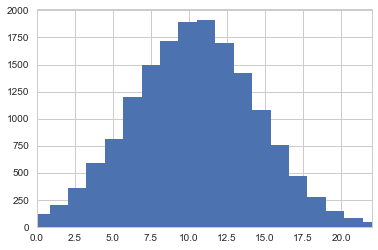

In [128]:
# Distribution of player's shots
distance_x, distance_y = 15, 30
df_ = prof_df[(prof_df.shot_distance > distance_x)&(prof_df.shot_distance <= distance_y)]        
print len(df_[df_.player_id == player]), df_[df_.player_id == player].depth.std(), df_[df_.player_id == player].depth.mean()
df_[df_.player_id == player].depth.hist(bins=100)
plt.xlim(0, 22)
plt.show()
plt.clf()

### Real distribution approach

In [131]:
depth_order = [str(x) for x in np.arange(-4, 28, 0.2)]

In [132]:
# gathering data from population statistics (visualization notebook)
population_stats = pd.DataFrame({'Distance': [15, 18, 21, 24, 27],
                                'Mean': [10.11, 9.64, 9.04, 8.84, 7.77],
                                'Median': [10.13, 9.69, 9.20, 9.03, 8.22]})

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


10.3269353483
15_18


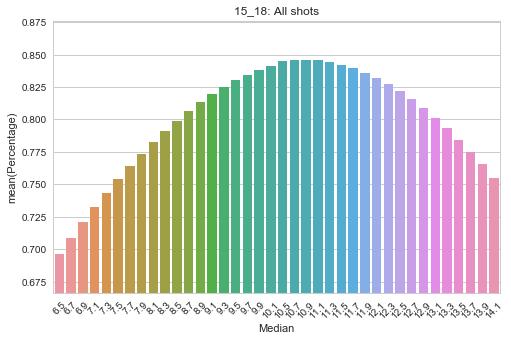

18_21


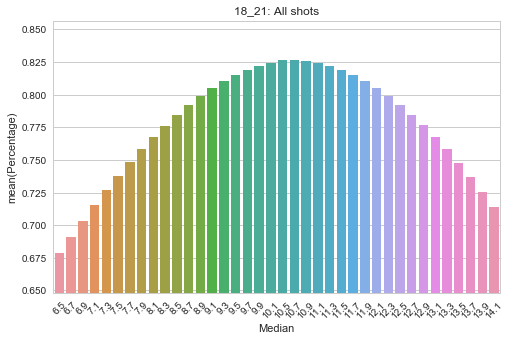

21_24


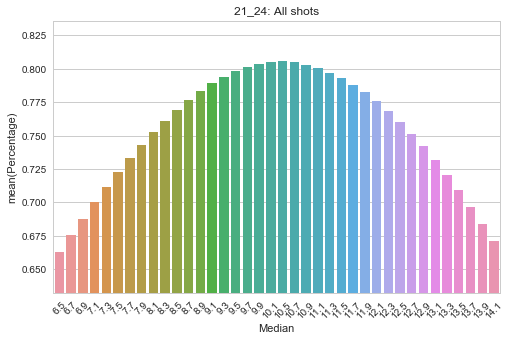

24_27


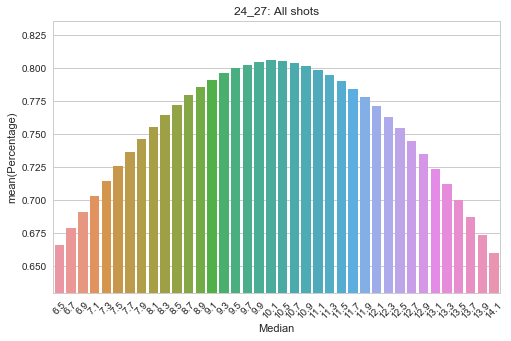

27_30


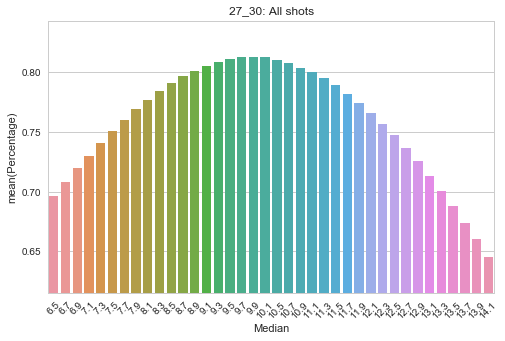

In [135]:
all_dfs = []
distance_x, distance_y = 15, 30

df_ = prof_df[(prof_df.shot_distance > distance_x)&(prof_df.shot_distance <= distance_y)]
df_['depth_rounded'] = df_['depth'].apply(round_two)
median = df_[df_.player_id == player].depth.median()
print median
depth_counts = pd.DataFrame(df_[df_.player_id == player].depth_rounded.value_counts()).ix[depth_order]
depth_counts.columns = [str(round(median, 1))]
depth_counts['depth_rounded'] = depth_counts.index
depth_counts = depth_counts.fillna(0)

new_medians = []
for i in range(1, 20):
    depth_counts[str(round(median, 1)+(i*0.2))] = depth_counts[str(round(median, 1))].shift(i).fillna(0)
    depth_counts[str(round(median, 1)-(i*0.2))] = depth_counts[str(round(median, 1))].shift(-i).fillna(0)
    new_medians.append(str(round(median, 1)-(i*0.2)))
    new_medians.append(str(round(median, 1)+(i*0.2)))

new_medians_float = [float(x) for x in new_medians]
new_medians_float = sort(new_medians_float)
new_medians = [str(x) for x in new_medians_float]

for m, distance in zip([15, 18, 21, 24, 27], ['15_18', '18_21', '21_24', '24_27', '27_30']):

    
    print distance
    df_ = pd.read_csv('../../processed_data/shot_distance.{0}.csv'.format(distance), index_col=0)
    df_ = df_[(df_.left_right > -2)&(df_.left_right < 2)]
    
    df_['depth_rounded'] = df_['depth'].apply(round_two)
    left_right_perc_df = df_[['depth_rounded', 'make_miss_int']].groupby('depth_rounded').mean().reset_index()
    left_right_perc_df['depth_rounded'] = pd.Categorical(left_right_perc_df.depth_rounded, depth_order)
    left_right_perc_df = left_right_perc_df.sort_values('depth_rounded')
    left_right_perc_df = left_right_perc_df[left_right_perc_df.depth_rounded.isin(depth_order)]

    merged = pd.merge(depth_counts, left_right_perc_df, on='depth_rounded')
    # introduce median-based counts
    percs = []
    for med in new_medians:
        percs.append(list(np.sum(merged[med] * merged['make_miss_int']) / merged[[str(round(median, 1))]].sum())[0])

    d = pd.DataFrame({'Median': new_medians, 'Percentage': percs,
                      'Distance': m})
    all_dfs.append(d)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Median', y='Percentage', data=d, order=new_medians)
    plt.xticks(rotation=45)
    plt.ylim(float(d.Percentage.min())-0.03, float(d.Percentage.max())+0.03)
    plt.title(distance + ': All shots')
    plt.show()
    plt.clf()

In [136]:
d = pd.concat(all_dfs)
d.Median = d.Median.astype(float)
for distance in [15, 18, 21, 24, 27]:
    d_dist = d[d.Distance == distance]
    population_median = list(population_stats[population_stats.Distance == distance].Median)[0]
    d_dist['distance_from_population'] = abs(d_dist.Median - population_median)

    lowest_distance = d_dist.distance_from_population.min()
    percentage_of_population_median = list(d_dist[d_dist.distance_from_population == lowest_distance].Percentage)[0]
    highest_percentage = d_dist.Percentage.max()

    print highest_percentage - percentage_of_population_median

0.00483437628997
0.00767199132997
0.0167386181021
0.0145771206569
0.0291041018432


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
